# Cap. 7 - Matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Gráficos de contorno

`plt.contour` faz gráficos de contorno a partir de arrays bidimensionais.

No caso de

```
contour(Z)
```
com `Z` sendo composto de pares $(x,y)$, seus índices serão usados como coordenadas.

De modo geral, podemos usar
```
contour(X,Y,Z)
```
com `X`, `Y` e `Z` tendo o mesmo *shape* ou com `X` e `Y` sendo arrays unidimensionais com tamanho, respectivamente, igual ao número de colunas e linhas em `Z`.

Além disso, a quantidade de linhas de contorno é controlada pelo parâmetro `levels`, que pode ser um escalar ou uma lista.

Por fim, as cores podem ser controladas passando um `colormap` ou uma dada cor.

Vejamos um exemplo:


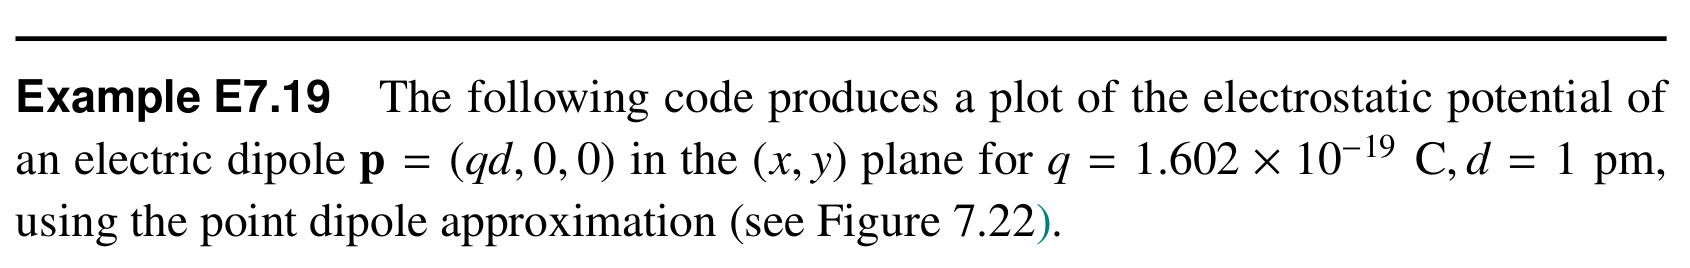

In [ ]:
q, eps0 = 1.602e-19, 8.854e-12

d = 1.e-12
k = (1/(4*np.pi*eps0))*(q*d)

# grid
X = np.linspace(-5e-11, 5e-11, 1000)
Y = np.linspace(-5e-11, 5e-11, 1000)
X, Y = np.meshgrid(X, Y)

# Potencial do dipolo
Phi = k * X / np.hypot(X, Y)**3

f, ax = plt.subplots(figsize=(5,5))

# define os níveis
levels = np.array([10**pw for pw in np.linspace(0,5,20)])
levels = sorted(list(-levels) + list(levels))

# gráfico
ax.contour(X, Y, Phi, levels=levels, linewidths=1)

In [ ]:
Phi

In [ ]:
X

In [ ]:
Y

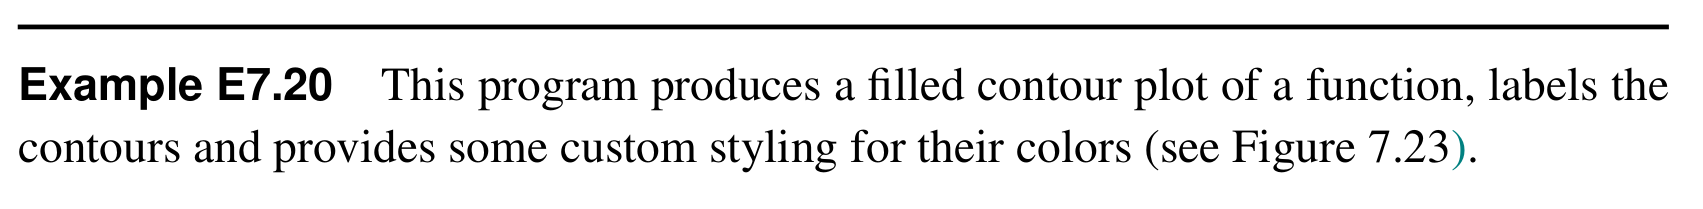

In [ ]:
X, Y = np.linspace(0,1,100), np.linspace(0,1,100)
X, Y = np.meshgrid(X, Y)

alpha = np.radians(25)
cX, cY = 0.5, 0.5
sigX, sigY = 0.2, 0.3
rX = np.cos(alpha) * (X-cX) - np.sin(alpha) * (Y-cY) + cX
rY = np.sin(alpha) * (X-cX) + np.cos(alpha) * (Y-cY) + cY

Z = (rX-cX)*np.exp(-((rX-cX)/sigX)**2) * np.exp(- ((rY-cY)/sigY)**2)

In [ ]:
f, ax = plt.subplots(figsize=(5,5))

cp = ax.contour(X, Y, Z, 20, cmap='magma')

In [ ]:
f, ax = plt.subplots(figsize=(5,5))

cpf = ax.contourf(X, Y, Z, 20, cmap='magma')

In [ ]:
cpf.levels

In [ ]:
f, ax = plt.subplots(figsize=(5,5))

cpf = ax.contourf(X, Y, Z, 20, cmap='magma')
cores = ['w' if level<0 else 'k' for level in cpf.levels]

cp = ax.contour(X, Y, Z, 20, colors=cores)
ax.clabel(cp, fontsize=10, colors=cores)

### Mapas de calor

Mapas de calor ou *heatmaps* são uma outra maneira de representar dados bidimensionais.

As funções `imshow`, `matshow`, `pcolor` e `pcolormesh` fazem esse tipo de gráfico.

`ax.imshow` pode ser usado para mostrar imagens:

In [ ]:
import matplotlib.image as mpimg

In [ ]:
!wget https://www.aen.pr.gov.br/sites/default/arquivos_restritos/files/imagem/2022-02/aereas_campus_sede_uem_109.jpg

In [ ]:
im = mpimg.imread('aereas_campus_sede_uem_109.jpg')

In [ ]:
im

In [ ]:
f, ax = plt.subplots()
ax.imshow(im)

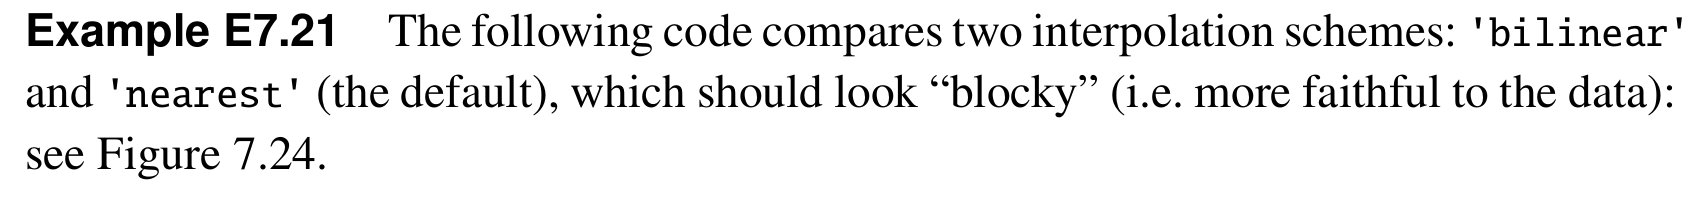

In [ ]:
a = np.eye(10,10)

In [ ]:
a[::-1,:]

In [ ]:
a += a[::-1,:]
a

In [ ]:
interpolations = ['antialiased', 'none', 'nearest', 'bilinear',
                  'bicubic', 'spline16', 'spline36', 'hanning',
                  'hamming', 'hermite', 'kaiser', 'quadric',
                  'catrom', 'gaussian', 'bessel', 'mitchell',
                  'sinc', 'lanczos', 'blackman']

In [ ]:
len(interpolations)

In [ ]:
f, ax = plt.subplots(ncols=4,nrows=5,figsize=(8,8),
                     sharex=True,sharey=True)

ax = ax.flatten()

for i, inter_ in enumerate(interpolations):
    ax[i].imshow(a, interpolation=inter_, cmap='magma')
    ax[i].set_title(inter_)

f.delaxes(ax[-1])
f.tight_layout(pad=0, w_pad=-15)

In [ ]:
f, ax = plt.subplots(ncols=4,nrows=5,figsize=(8,8),
                     sharex=True,sharey=True)

ax = ax.flatten()

for i, inter_ in enumerate(interpolations):
    ax[i].matshow(a, interpolation=inter_, cmap='magma')
    ax[i].set_title(inter_)

f.delaxes(ax[-1])
f.tight_layout(pad=0, w_pad=-15)

*Exemplo E7.22*: [Fractal de Barnsley fern](https://en.wikipedia.org/wiki/Barnsley_fern).

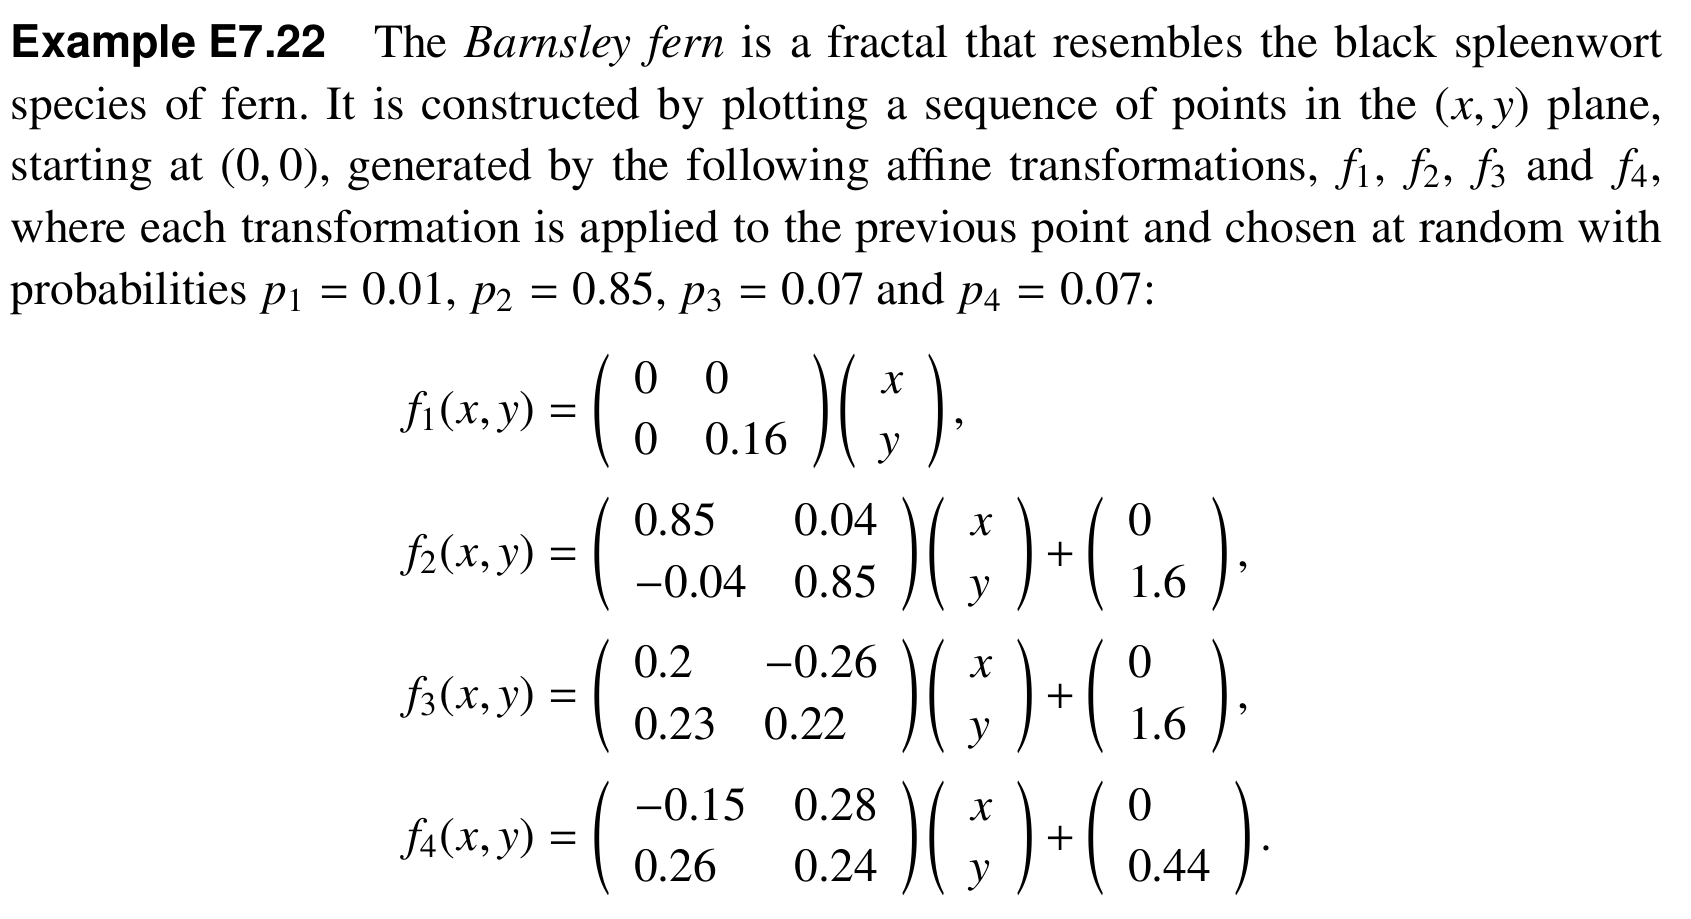

In [ ]:
def fs(x, y, ps=[0.01, 0.85, 0.07, 0.07]):

    i = np.random.choice([1,2,3,4],
                         p=ps)

    if i==1:
        return 0., 0.16*y
    if i==2:
        return 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6
    if i==3:
        return 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6
    if i==4:
        return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44


In [ ]:
fs(0,0)

In [ ]:
todos_xy = []
x,y = 0,0

todos_xy.append((x,y))

for _ in range(50000):
    x,y = fs(x,y)
    todos_xy.append((x,y))

In [ ]:
todos_xy = np.asarray(todos_xy)
todos_xy

In [ ]:
xmin = min(todos_xy[:,0])
xmax = max(todos_xy[:,0])

ymin = min(todos_xy[:,1])
ymax = max(todos_xy[:,1])

print(xmin,xmax)
print(ymin,ymax)

In [ ]:
width, height = 300, 300
map_xy_to_ij = lambda x,y: (int(((x-xmin)/(xmax-xmin))*(width-1)),
                            int(((y-ymin)/(ymax-ymin))*(height-1)))

In [ ]:
map_xy_to_ij(xmin,ymin),map_xy_to_ij(xmax,ymax)

In [ ]:
img = np.zeros((width, height))
for x,y in todos_xy:
    i,j = map_xy_to_ij(x,y)
    img[i,j] = 1

In [ ]:
f, ax = plt.subplots(figsize=(5,8))
ax.imshow(img, cmap='Greens')

In [ ]:
f, ax = plt.subplots(figsize=(5,8))
ax.imshow(img.T, cmap='Greens')

In [ ]:
f, ax = plt.subplots(figsize=(5,8))
ax.imshow(img.T[::-1,:], cmap='Greens')

In [ ]:
def bf_fractal(ps=[0.01, 0.85, 0.07, 0.07], width=300, height=300, npontos=50000):
    todos_xy = []
    x,y = 0,0

    todos_xy.append((x,y))

    for _ in range(int(npontos)):
        x,y = fs(x,y,ps)
        todos_xy.append((x,y))

    todos_xy = np.asarray(todos_xy)

    xmin = min(todos_xy[:,0])
    xmax = max(todos_xy[:,0])

    ymin = min(todos_xy[:,1])
    ymax = max(todos_xy[:,1])

    map_xy_to_ij = lambda x,y: (int(((x-xmin)/(xmax-xmin))*(width-1)),
                                int(((y-ymin)/(ymax-ymin))*(height-1)))

    img = np.zeros((width, height))
    for x,y in todos_xy:
        i,j = map_xy_to_ij(x,y)
        img[i,j] = 1

    img = img.T[::-1,:]

    f, ax = plt.subplots(figsize=(5,8))
    ax.imshow(img, cmap='Greys')
    plt.close(f)
    return f

In [ ]:
bf_fractal(width=500, height=500, npontos=5e5)

In [ ]:
np.sum([0.01, 0.85, 0.07, 0.07])

In [ ]:
def graf(p1=0.01,p2=0.85,p3=0.07):
    f = bf_fractal(ps=[p1, p2, p3, 1-p1-p2-p3])
    return f

In [ ]:
graf()

In [ ]:
graf(0.4,0.4,0.02)

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(p1=(0.,1.,0.01),p2=(0.,1.,0.01),p3=(0.,1.,0.01))
def graf(p1=0.01,p2=0.85,p3=0.07):
    f = bf_fractal(ps=[p1, p2, p3, 1-p1-p2-p3])
    return f

`pcolor` e `pcolormesh` funcionam de maneira similar ao `imshow`. Porém usam a convenção de que a origem do sistema de coordenadas está no canto inferior esquerdo

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(10,5))
a = np.eye(10,10)
ax[0].pcolor(a)
ax[1].pcolormesh(a)

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(10,5))
a = np.eye(10,10)
ax[0].imshow(a)
ax[1].matshow(a)

Além disso, para incluir uma barra de cor, usamos `fig.colorbar`.

Vejamos um exemplo:

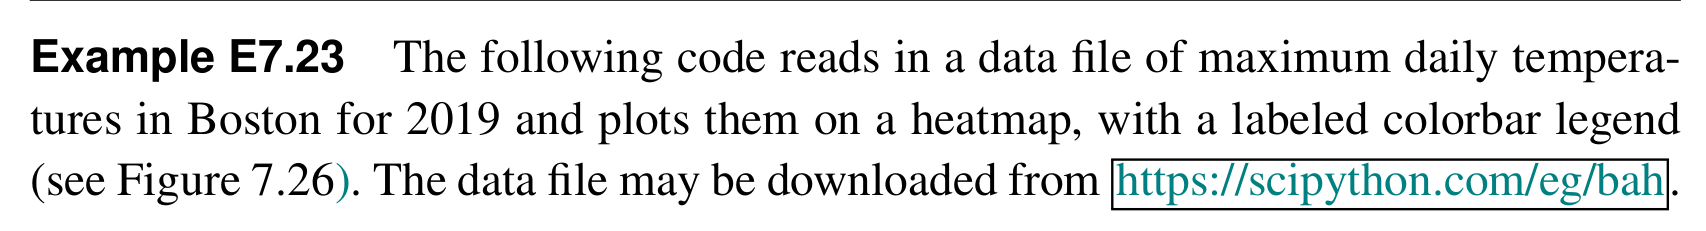

In [ ]:
!wget https://scipython.com/static/media/2/examples/E7/boston2019.dat

In [ ]:
dt = np.dtype([('month', int), ('day', int), ('T', float)])
data = np.genfromtxt('boston2019.dat', dtype=dt, usecols=(1, 2, 3),
                     delimiter=(4, 2, 2, 6))
data[:10]

In [ ]:
heatmap = np.empty((12, 31))
heatmap[:] = np.nan

for month, day, T in data:
    heatmap[month-1, day-1] = T

heatmap

In [ ]:
f, ax = plt.subplots(figsize=(10,5))

im = ax.imshow(heatmap, interpolation='nearest')

ax.set_yticks(range(12))
ax.set_yticklabels(['Jan', 'Fev', 'Mac', 'Abr', 'Mai', 'Jun',
                    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
days = np.array(range(0, 31, 2))

ax.set_xticks(days)
ax.set_xticklabels(['{:d}'.format(day+1) for day in days])
ax.set_xlabel('Dia do mês')
ax.set_title('Temperatura máxima em Boston no ano de 2019')

cbar = f.colorbar(ax=ax, mappable=im, orientation='horizontal', fraction=.097)
cbar.set_label('Temperatura, $^\circ\mathrm{C}$')

Exemplo com a equação de difusão bidimensional.

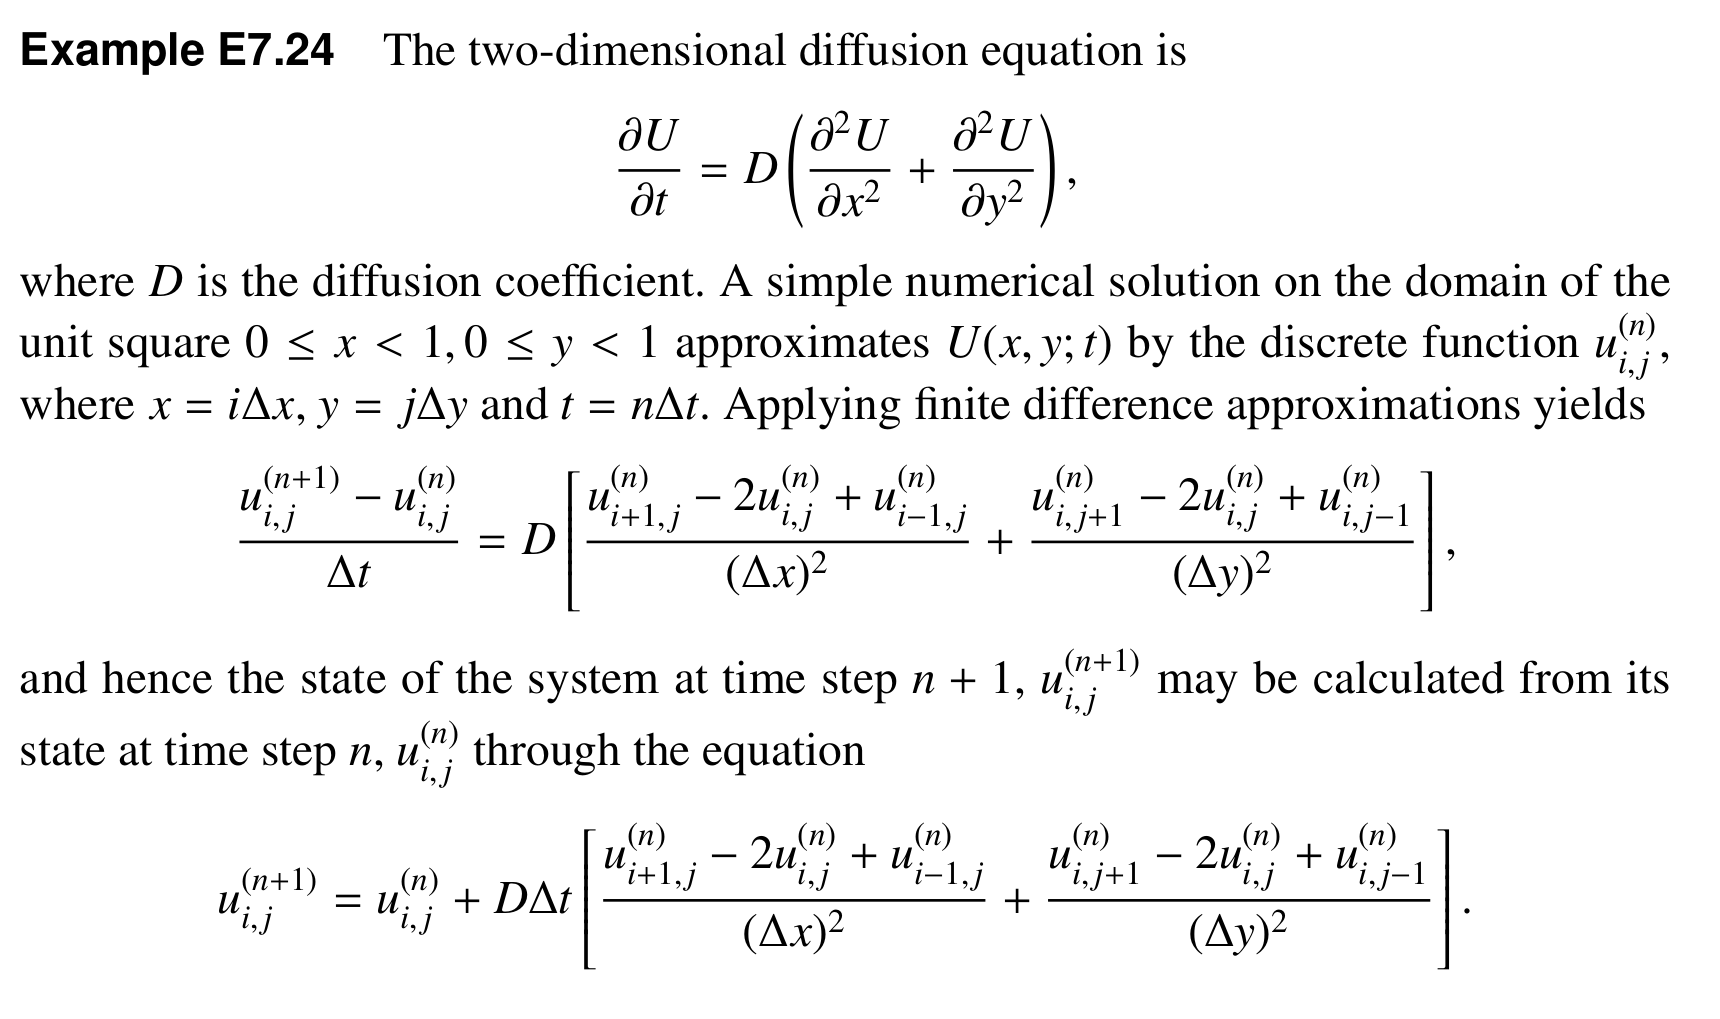

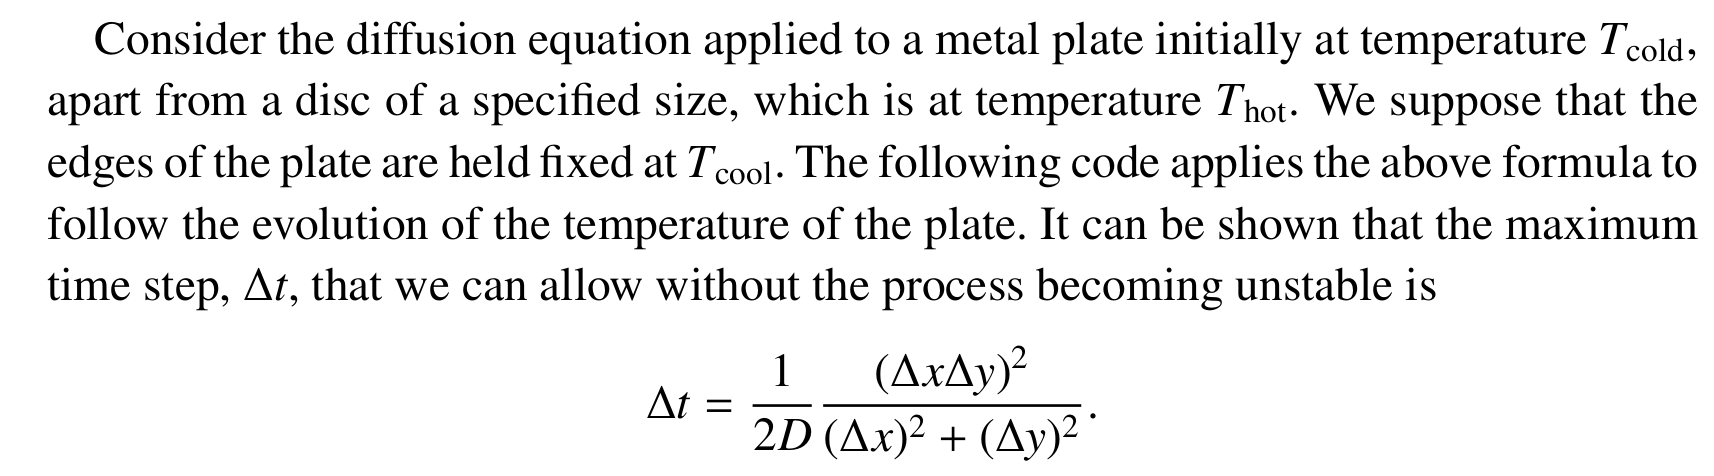

In [ ]:
# tamanho da placa, mm
w = h = 10.
# tamanho das divisões na malha em x e y, mm
dx = dy = 0.1
# difusividade térmica, mm2.s-1
D = 4.

Tcool, Thot = 300, 1000

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
#incremento no tempo
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# condição inicial - Thot num círculo de raio r centrado em (cx,cy)
r, cx, cy = 1, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # propaga a solução usando a regra
    # repare a ausência de loops
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    #estado anterior
    u0 = u.copy()

    return u0, u

In [ ]:
nsteps = 501

us = [u0]

for _ in range(nsteps):
    u0, u = do_timestep(u0, u)
    us.append(u.copy())

In [ ]:
!pip install palettable
import palettable

In [ ]:
def difusao2d(i=0, tmin=300, tmax=700):

    f, ax = plt.subplots(figsize=(5,8))
    ax.imshow(us[i],
              cmap=palettable.colorbrewer.sequential.Reds_3.get_mpl_colormap(),
              vmin=tmin,
              vmax=tmax)
    ax.set_title(f"{i*dt*1000:.2} ms")
    plt.close(f)
    return f

In [ ]:
difusao2d(10)

In [ ]:
@interact(i=(0,500))
def difusao2d(i=0):
    tmin=Tcool
    tmax=Thot
    f, ax = plt.subplots(figsize=(5,8))
    im = ax.imshow(us[i],
             cmap=palettable.colorbrewer.sequential.Reds_3.get_mpl_colormap(),
              vmin=tmin,
              vmax=tmax)
    ax.set_title(f"{i*dt*1000:.2f} ms")
    cbar = f.colorbar(ax=ax, mappable=im, fraction=0.045)
    cbar.set_label('Temperatura, K')
    plt.close(f)
    return f

### Gráficos 3d

O matplotlib foi desenvolvido para gráficos 2d, mas ele também oferece suporte para gráficos 3d.

Para isso, devemos usar o argumento `projection` ao criar um axis e importar `Axes3D` do submódulo `mpl_toolkits.mplot3d`.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
f = plt.figure()
ax = f.add_subplot(projection='3d')

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})

`plot_surface` e `plot_wireframe` representam funções em 3d usando grids de arrays bidimensionais, tais como aqueles usados nos gráficos de contorno.

*Exemplo E7.25* Gaussianas 2d.

In [ ]:
L, n = 2, 400
x = np.linspace(-L, L, n)
y = np.linspace(-L, L, n)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_wireframe(X, Y, Z,
                  rstride=100, #espaçamento usado para fazer as linhas em y
                  cstride=10, #espaçamento usado para fazer as linhas em x
                  )
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z,
                  rstride=10, #espaçamento usado para fazer as linhas em y
                  cstride=10, #espaçamento usado para fazer as linhas em x
                  cmap='magma'
                  )
ax.set_xlabel('x')
ax.set_ylabel('y')

Para mudar o ângulo de visão podemos usar `ax.view_init`

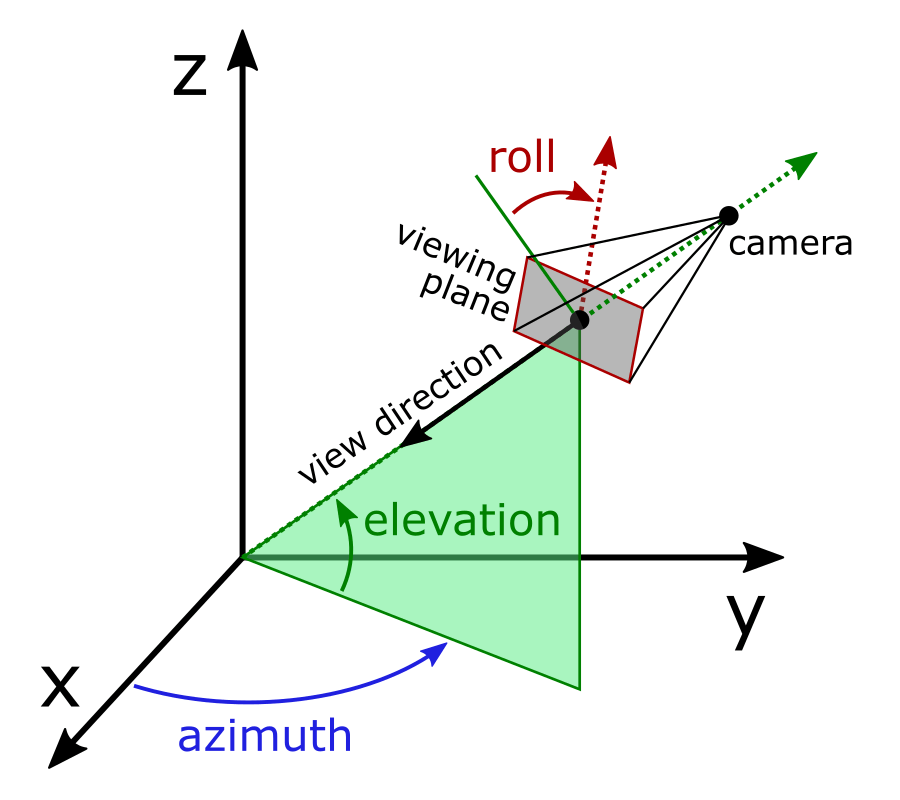

In [ ]:
@interact(elev=(-90,90,5), azim=(-180,180,5), roll=(0,360,5))
def vangle(elev=30, azim=-60, roll=0):
    f, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_surface(X, Y, Z,
                    rstride=10, #espaçamento usado para fazer as linhas em y
                    cstride=10, #espaçamento usado para fazer as linhas em x
                    cmap='magma'
                    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.view_init(elev,azim,roll)
    plt.close(f)
    return f

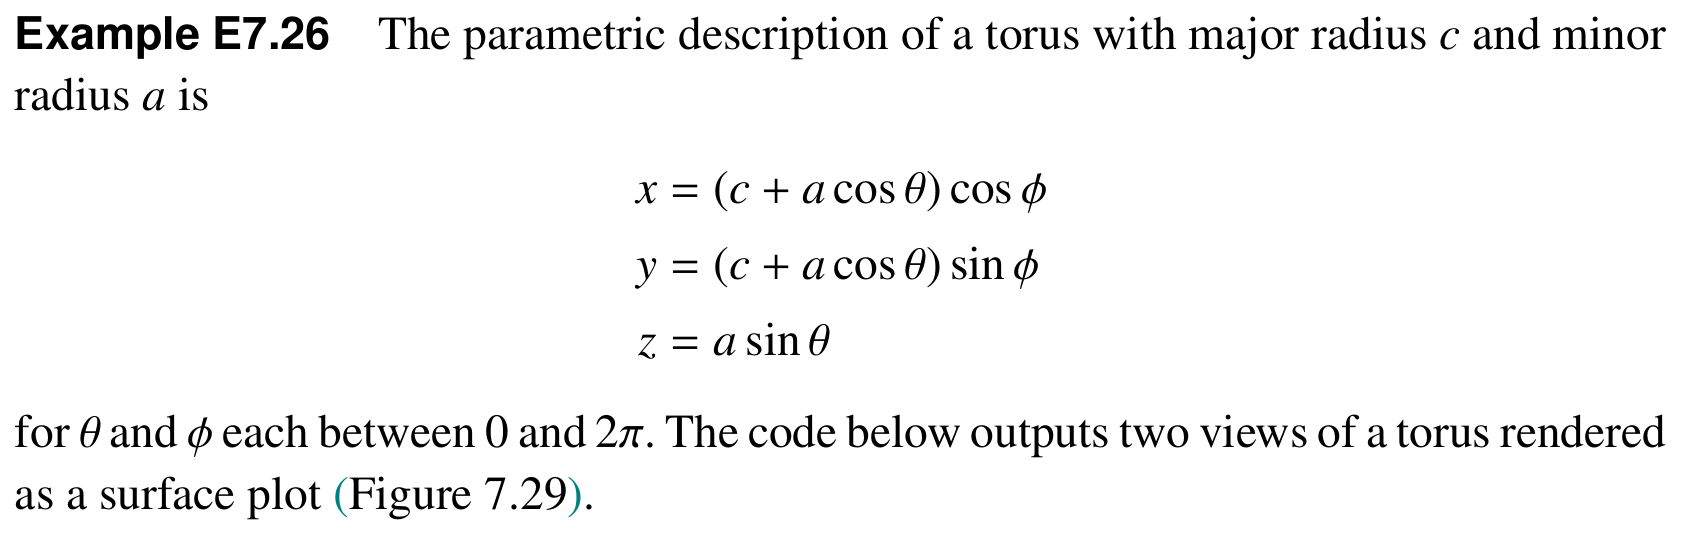

In [ ]:
n = 100

theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

In [ ]:
@interact(elev=(-90,90,5), azim=(-180,180,5), roll=(0,360,5))
def vangle(elev=30, azim=-60, roll=0):
    f, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_surface(x, y, z,
                    rstride=5, #espaçamento usado para fazer as linhas em y
                    cstride=5, #espaçamento usado para fazer as linhas em x
                    cmap='magma'
                    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(-3,3)
    ax.view_init(elev,azim,roll)
    plt.close(f)
    return f

**Gráficos de linha e scatter também funcionam com `Axes3D`**

- `ax.plot(x,y,z)`
- `ax.scatter(x,y,z)`

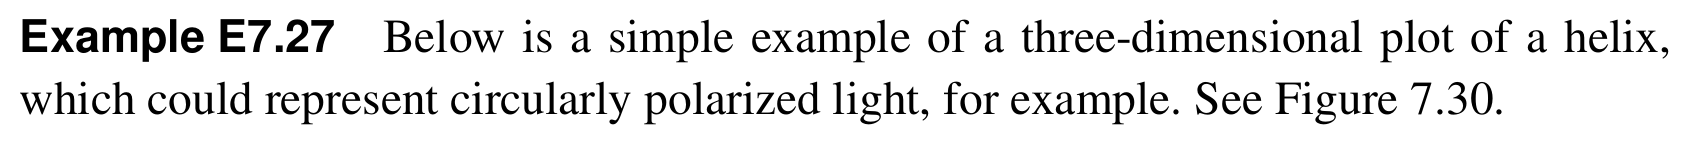

In [ ]:
n = 1000
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)

x = theta
z =  np.sin(theta)
y =  np.cos(theta)

f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot(x, y, z, '#202020', lw=2)

In [ ]:
X = np.random.normal(size=100)
Y = np.random.normal(size=100)
Z = np.random.normal(size=100)

f, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.scatter(X, Y, Z,c=Z)

### Animações

Vamos usar a função `FuncAnimation` do submódulo `matplotlib.animation` para criar animações simples.


In [ ]:
#para funcionar no calab
from matplotlib import rc
rc('animation', html='jshtml')
rc('animation', embed_limit=50)

In [ ]:
import matplotlib.animation as animation

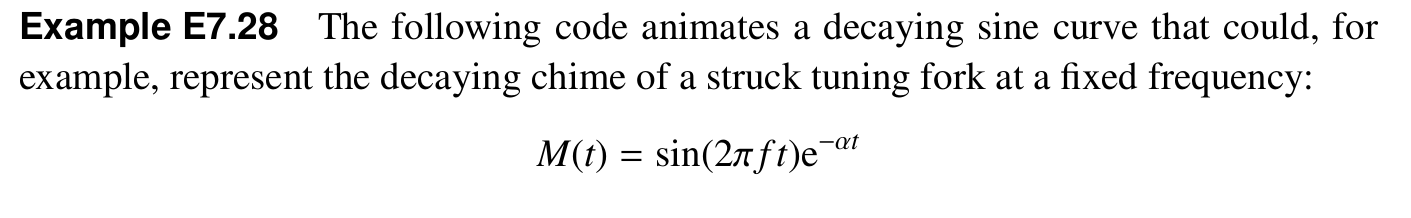

In [ ]:
# incremento de tempo, tempo máximo
dt, tmax = 0.01, 5
# frequência, inverso do tempo de decaimento
f, alpha = 2.5, 1
# lista vazias que vão armazenar os pontos
t, M = [], []

# gráfico em branco que será atualizado pela animação
fig, ax = plt.subplots()
line, = ax.plot([], [], c='#202020',lw=2)

ax.set_xlim(0, tmax)
ax.set_ylim(-1, 1)
ax.set_xlabel('t (s)')
ax.set_ylabel('M (u.a.)')

In [ ]:
def animate(i):
    """gráfico do frame i da animação."""

    #define t e M como globais
    global t, M

    # adiciona os novos pontos (t,M)
    _t = i*dt
    t.append(_t)
    M.append(np.sin(2*np.pi*f*_t) * np.exp(-alpha*_t))
    # atualiza a linha
    line.set_data(t, M)

    return fig

In [ ]:
animate(1)

In [ ]:
# intervalos de tempo entre frames, total de frames
interval, nframes = 1000 * dt, int(tmax / dt)
# inicializa a animação
ani = animation.FuncAnimation(fig, animate, frames=nframes,
                              repeat=False,
                              interval=interval)

In [ ]:
#~2 min
ani

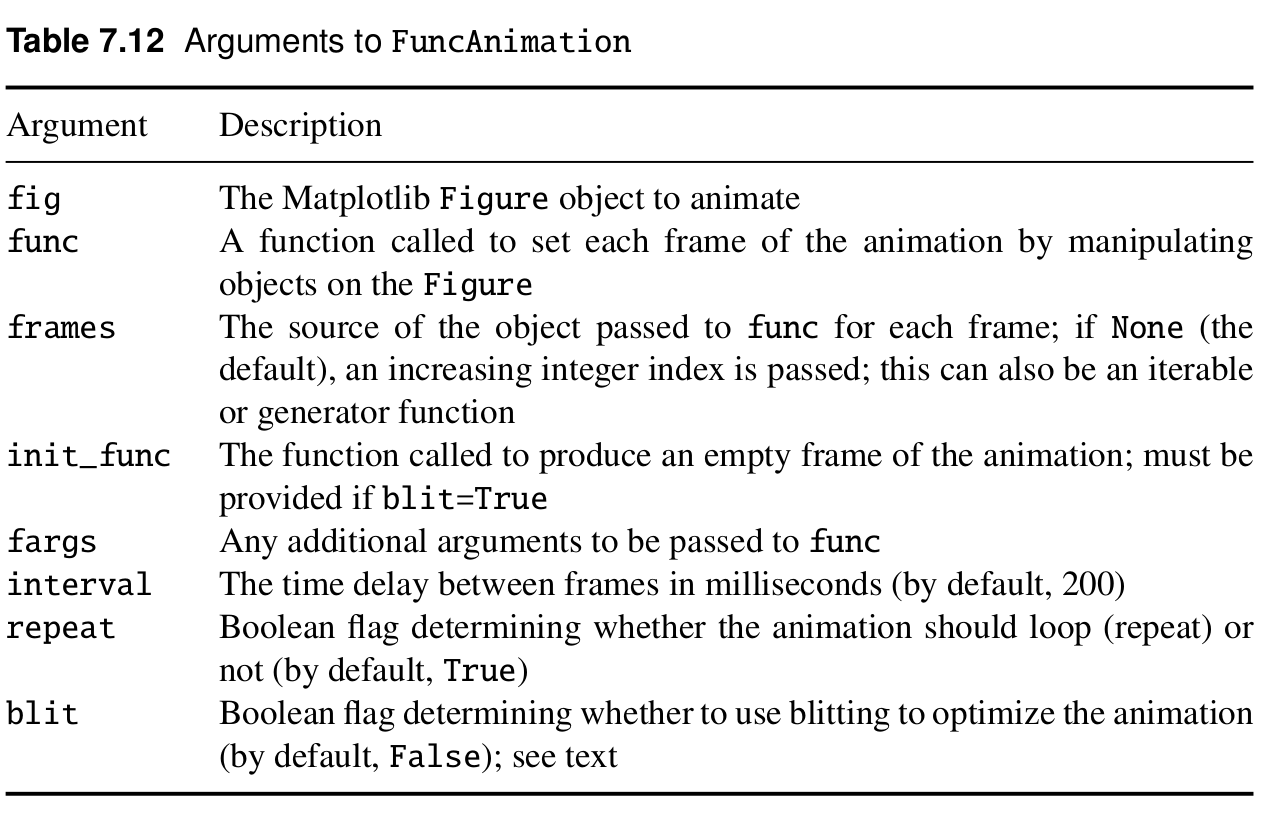

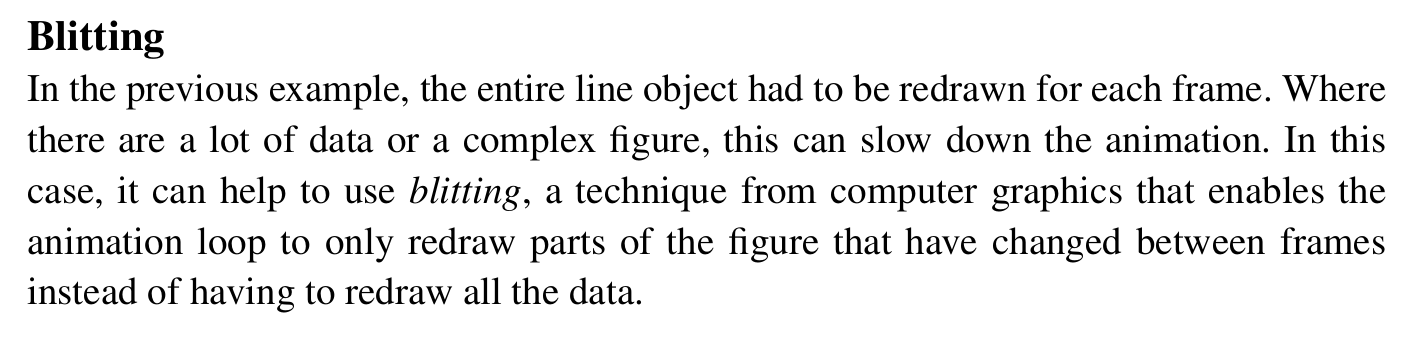

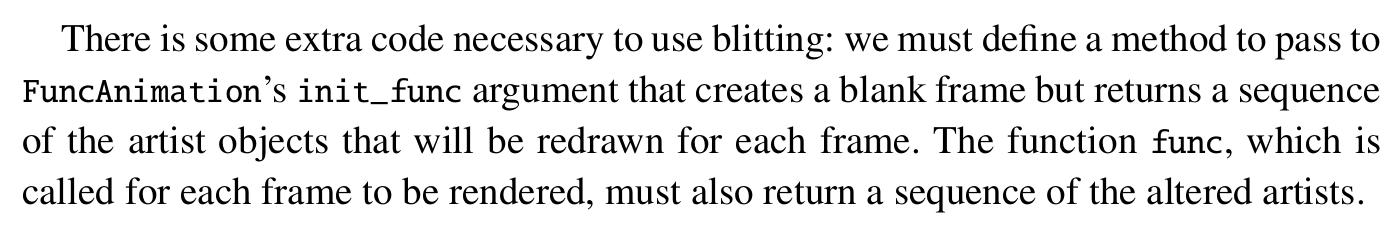

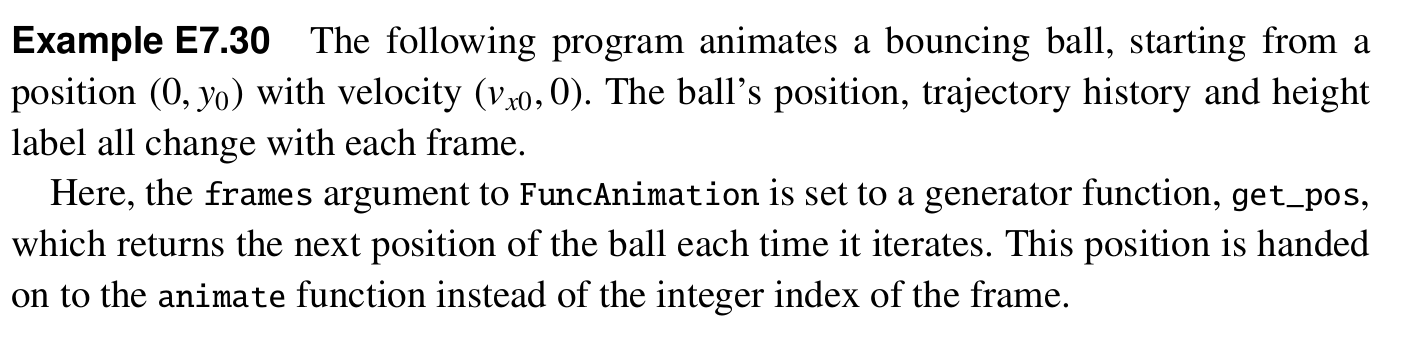

In [ ]:
# aceleração da gravidade
g = 9.81
# range máximo da trajetória
XMAX = 5
# coeficiente de restituição (-v_up/v_down).
cor = 0.65
# incremento de tempo
dt = 0.005

# condição inicial
x0, y0 = 0, 4
vx0, vy0 = 1, 0

def get_pos(t=0):
    """Um gerador que retorna a posição da bola num tempo t.
       Essa função é passada para FuncAnimation e usada como
       argumento da função animate."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce!
            y = 0
            vy = -vy * cor
        yield x, y

def init():
    """Figura vazias."""
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ (m)')
    ax.set_ylabel('$y$ (m)')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Altura: {y0:.1f} m')
    #objetos que serão modificados em cada frame
    return line, ball, height_text

def animate(pos):
    """Em cada frame, avança a simulação."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Altura: {y:.1f} m')
    return line, ball, height_text

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = 1000*dt
ani = animation.FuncAnimation(fig, animate, get_pos,
                              blit=True,
                              interval=interval,
                              repeat=False,
                              init_func=init,
                              cache_frame_data=False)

In [ ]:
#~2 min
ani

## Novas listas de problemas: Caps. 5 e 6

In [ ]:
estutandes_pos = [
    "Anna Lucchi", "Adriano Neves", "Carlos Batistela", "Gabriel Colombo",
    "Hugo Machado", "Jean Passos", "Jhonatan Berrar", "Leonardo Voltarelli",
    "Luiz Pantaleão", "Marcelo Oliveira", "Manoel Souza", "Mateus Tarozo",
    "Mônica Prates", "Vitor Ribeiro"
]

estudantes_grad = [
    "ABIMAEL LINO RIBEIRO", "ANA CRISTINA SANTOS VIEIRA",
    "ANGELO AGGIO FLORES", "ARÃO VICTOR ROCHA DOS SANTOS",
    "BRUNO MAIA DE SOUZA", "CAMILA DOS SANTOS SOUZA",
    "CHRISTIAN MOREIRA MENDES", "CRISTIAN LOPES DOS SANTOS", "ENZO CALIALI",
    "FERNANDO HENRIQUE MOREIRA VALDIR", "GABRIEL CARDOSO DE MORAES",
    "GABRIEL MARTINS DUBAS", "GILMAR HORCHULHAK", "GIOVANNI ENZO DELMONACO",
    "GRAZIELLA DIAS DE MENDONÇA", "IAN CAPÉL VENDRAMIN",
    "JOÃO GUILHERME DE SOUZA CAMPAGNOLI", "JOAO PEDRO FULGENCIO DO NASCIMENTO",
    "JOHNATAN ZACARIOTO GOMES", "JOSÉ LEONARDO OLER", "JÚLIA DE SOUZA FLÓES",
    "KESLER PIERRE", "LEONARDO BAPTISTA DE PAULA NETO",
    "LEONARDO VINÍCIOS OLIVEIRA BRANCO", "LIEDSON ROCHA MARQUES",
    "LUCIANO SOARES DOS PRASERES JUNIOR", "MARCELO GUARNIERI",
    "MARCELO RYU DA ROCHA", "MARIA JULIA COSTA MISTURA",
    "MATHEUS ALVES DA SILVA", "MATHEUS BELASQUE MONTEIRO DE LIMA",
    "MATHEUS DI DOMENICO", "MICHEL RUAN ALVES CARVALHO",
    "NICOLAS DA SILVA FERNANDES", "PEDRO HENRIQUE MEDEIROS MONTALBAN",
    "PIETRO GIUSEPPE CARGNIN FERREIRA", "RAFAELA LAVAGNOLI",
    "RENATO HIROAKI IVANAGA", "ROSE MOURA QUIRINO", "RUDAH ALVES LEITE",
    "SAMUEL SALVADOR DOS SANTOS", "SOPHIA HELLEN DE ASSIS DOMINGUES",
    "THAINA GOMES PEREIRA ZAMPIERI", "Vitor Hugo Ferrari Ribeiro",
    "Kaique Gabriel Boldrin"
]

In [ ]:
range_problemas_caps6e7 = [
    ["P6.1.1", "P6.1.3"],
    ["P6.2.1", "P6.2.3"],
    ["P6.3.1", "P6.3.3"],
    ["P6.4.1", "P6.4.4"],
    ["P6.5.1", "P6.5.7"],
    ["P6.6.1", "P6.6.4"],
    ["P6.7.1", "P6.7.3"],
    ["P7.4.1", "P7.4.5"],
    ["P7.5.1", "P7.5.5"],
    ["P7.7.1", "P7.7.3"],
]

In [ ]:
lista_problemas = []
for range_p in range_problemas_caps6e7:
    i_min=int(range_p[0].split('.')[-1])
    i_max=int(range_p[1].split('.')[-1])

    prefix = '.'.join(range_p[0].split('.')[:2])

    for i in range(i_min,i_max+1):
        lista_problemas.append(f"{prefix}.{i}")

In [ ]:
print(f"Total de problemas nos capítulos 6 e 7: {len(lista_problemas)}")

In [ ]:
print(f"Total de estudantes de graduação....: {len(estudantes_grad)}")
print(f"Total de estudantes de pós-graduação: {len(estutandes_pos)}")
print(" "*37+"+--")
print(" "*38+f"{len(estutandes_pos)+len(estudantes_grad)}")

In [ ]:
import numpy as np

n_problemas = 10

problemas_estudantes = {}

for estudante in estutandes_pos+estudantes_grad:
    problemas_sel = np.random.choice(lista_problemas,size=n_problemas,replace=False)
    problemas_estudantes[estudante.title()] = sorted(list(problemas_sel))

In [ ]:
len(np.unique(np.hstack(list(problemas_estudantes.values()))))

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(problemas_estudantes).T
df.tail()

In [ ]:
df.to_excel('problemas_caps_6e7.xlsx')